DIFFUSION INTERVENTIONS 

In [1]:
from nnsight.models.DiffusionModel import DiffusionModel
import torch
from PIL import Image
import matplotlib.pyplot as plt

model = DiffusionModel("CompVis/stable-diffusion-v1-4", dispatch=True).to('cuda:0')

/share/u/imgr/miniconda3/envs/nnsight/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Keyword arguments {'trust_remote_code': True} are not expected by StableDiffusionPipeline and will be ignored.
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 14.41it/s]


  4%|▍         | 2/50 [00:00<00:09,  4.99it/s]

100%|██████████| 50/50 [00:05<00:00,  8.73it/s]


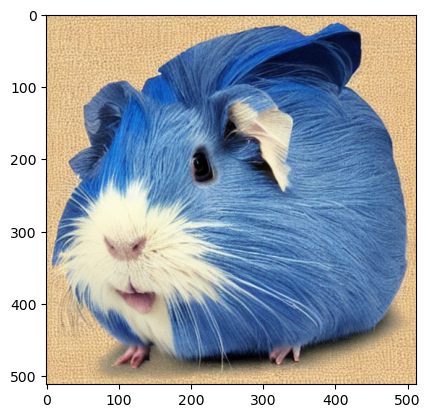

In [2]:
generator = torch.Generator()
generator.manual_seed(40)
with model.generate('blue guinea pig', num_inference_steps=50, generator=generator, validate=False, scan=False):
    zzz = model.output.save()
with model.generate('blue guinea pig', num_inference_steps=50, generator=generator, validate=False, scan=False):
    zzz2 = model.output.save()
plt.imshow(zzz.images[0])
plt.imshow(zzz2.images[0])

In [3]:
#LAYER PATHS IN THE RIGHT ORDER

my_self_layers =[
    '.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn1',
    '.unet.down_blocks.0.attentions.1.transformer_blocks.0.attn1',
    '.unet.down_blocks.1.attentions.0.transformer_blocks.0.attn1',
    '.unet.down_blocks.1.attentions.1.transformer_blocks.0.attn1',
    '.unet.down_blocks.2.attentions.0.transformer_blocks.0.attn1',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1',
    '.unet.mid_block.attentions.0.transformer_blocks.0.attn1',
    '.unet.up_blocks.1.attentions.0.transformer_blocks.0.attn1',
    '.unet.up_blocks.1.attentions.1.transformer_blocks.0.attn1',
    '.unet.up_blocks.1.attentions.2.transformer_blocks.0.attn1',
    '.unet.up_blocks.2.attentions.0.transformer_blocks.0.attn1',
    '.unet.up_blocks.2.attentions.1.transformer_blocks.0.attn1',
    '.unet.up_blocks.2.attentions.2.transformer_blocks.0.attn1',
    '.unet.up_blocks.3.attentions.0.transformer_blocks.0.attn1',
    '.unet.up_blocks.3.attentions.1.transformer_blocks.0.attn1',
    '.unet.up_blocks.3.attentions.2.transformer_blocks.0.attn1'
]

my_cross_layers =[
    '.unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2',
    '.unet.down_blocks.0.attentions.1.transformer_blocks.0.attn2',
    '.unet.down_blocks.1.attentions.0.transformer_blocks.0.attn2',
    '.unet.down_blocks.1.attentions.1.transformer_blocks.0.attn2',
    '.unet.down_blocks.2.attentions.0.transformer_blocks.0.attn2',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2',
    '.unet.mid_block.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.1.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.1.attentions.1.transformer_blocks.0.attn2',
    '.unet.up_blocks.1.attentions.2.transformer_blocks.0.attn2',
    '.unet.up_blocks.2.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.2.attentions.1.transformer_blocks.0.attn2',
    '.unet.up_blocks.2.attentions.2.transformer_blocks.0.attn2',
    '.unet.up_blocks.3.attentions.0.transformer_blocks.0.attn2',
    '.unet.up_blocks.3.attentions.1.transformer_blocks.0.attn2',
    '.unet.up_blocks.3.attentions.2.transformer_blocks.0.attn2'
]

In [26]:
#ELEMENTS OF ONE LAYER

#6TH SELF ATTN
my_6th_self = [
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_q',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_k',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_v',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.0',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn1.to_out.1'
]

#6TH CROSS ATTN
my_6th_cross = [
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_q',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0',
    '.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.1'
]

PRINT SHAPES

In [ ]:
shapes = []
with model.generate('purple woodpecker', num_inference_steps=50, generator=generator, validate=False, scan=False): #
        
    modules = model._envoy.envoys(lambda envoy : envoy._module_path.startswith('.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2'))

    for module in modules:
        print(module._module_path, module.output)
        #shapes.append((module._module_path, module.output.shape.save()))

.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2 InterventionProxy (argument_1): <class 'inspect._empty'>
.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_q InterventionProxy (argument_2): <class 'inspect._empty'>
.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_k InterventionProxy (argument_3): <class 'inspect._empty'>
.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_v InterventionProxy (argument_4): <class 'inspect._empty'>
.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out [InterventionProxy (argument_5): <class 'inspect._empty'>, InterventionProxy (argument_6): <class 'inspect._empty'>]
.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.0 InterventionProxy (argument_5): <class 'inspect._empty'>
.unet.down_blocks.2.attentions.1.transformer_blocks.0.attn2.to_out.1 InterventionProxy (argument_6): <class 'inspect._empty'>


100%|██████████| 50/50 [00:05<00:00,  8.63it/s]


In [ ]:
#Embedding for empty prompt
prompt_embeds, negative_prompt_embeds = model.pipeline.encode_prompt("", torch.device("cuda"), 1, False, None) #tokens for empty prompt
# if model.pipeline.do_classifier_free_guidance:
#     prompt_embeds = torch.cat([negative_prompt_embeds, prompt_embeds])

OLD FUNCTION FOR MANUAL INTERVENTIONS (don't use)

In [ ]:
def inspect_module(m, how, other):
    generator.manual_seed(40)
    with model.generate('purple woodpecker', num_inference_steps=50, generator=generator, validate=False, scan=False): #
        
        modules = model._envoy.envoys(lambda envoy : envoy._module_path.endswith('attn1') or envoy._module_path.endswith('attn2')) #for all self and cross attn right now

        for module in modules:
            #print(module._module_path)
            #print(module)    

            if module._module_path != my_self_layers[m]:
                if other == 'keep':
                    pass
                else:
                    for i in range(0, 50): #timesteps          
                        if i != 0:
                            module.next() #this is how you tell the module that we are working with the next iteration

                        if other == 'ablate':
                            module.output[:] = 0 #ablate the attention map
                        
                        if other == 'emptyprompt':
                            module.input[1]['encoder_hidden_states'] = prompt_embeds #give it the attention map for empty prompt
                        
                        if other == 'keep':
                            pass
                    
            else:
                if how == 'keep':
                    print('KEPT ONLY', module._module_path)
                
                elif how == 'increase':
                    for i in range(0, 50): #timesteps          
                        if i != 0:
                            module.next() #this is how you tell the module that we are working with the next iteration
                            module.output[:] = .2

                #TO PLAY WITH TIMESTEPS
                # for i in range(50): #timesteps  
                #     if i != 0:
                #         module.next() #this is how you tell the module that we are working with the next iteration
                        
                    #module.output[:] = 0 #ablates output
                    #shapes.append((module._module_path, module.output.shape.save()))
        
        zzz = model.output.save()
    return zzz
    #plt.imshow(zzz.images[0])
    #return(zzz.images[0])

#             zzz = model.output.save()

#     plt.subplot(1, 16, m+1)
#     plt.imshow(zzz.images[0])
# plt.show

#zzz.images[0].save('try.png')

increase & ablate

100%|██████████| 50/50 [00:05<00:00,  8.61it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
100%|██████████| 50/50 [00:05<00:00,  8.50it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
100%|██████████| 50/50 [00:05<00:00,  8.48it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
100%|██████████| 50/50 [00:05<00:00,  8.42it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

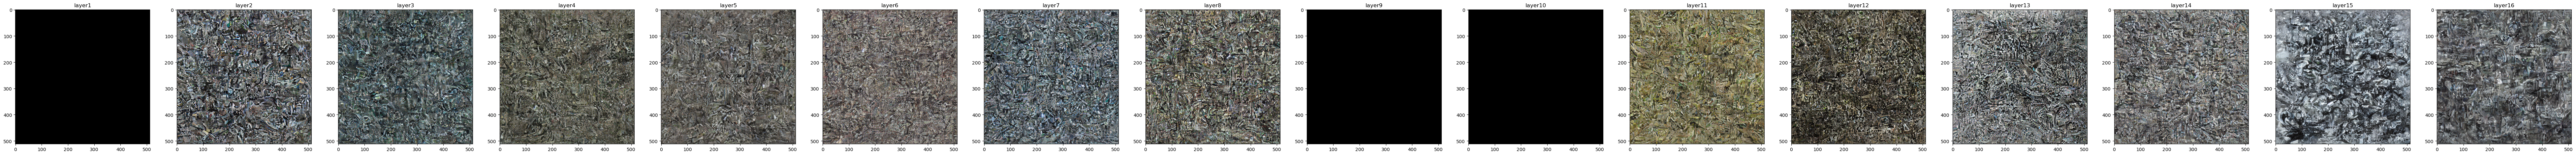

In [ ]:
plt.figure(figsize=(100,20))
for m in range(16):
    zzz = inspect_module(m, 'increase', 'ablate')
    plt.subplot(1, 16, m+1)
    plt.title(f"layer{m+1}")
    plt.imshow(zzz.images[0])
plt.show

NEW FUNCTION:

In [6]:
from main import load, run
from interventions.ablate import AblationIntervention
from interventions.encoder import EncoderIntervention
from util import encode_prompt

Keyword arguments {'trust_remote_code': True} are not expected by StableDiffusionPipeline and will be ignored.
100%|██████████| 50/50 [00:05<00:00,  8.79it/s]


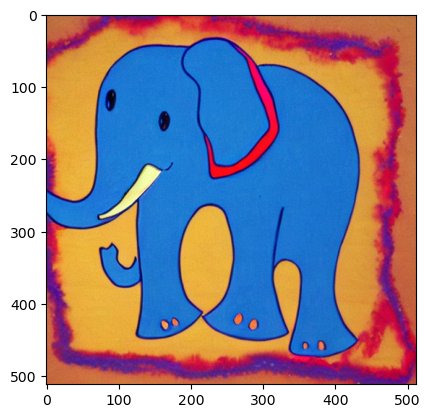

In [7]:
model = load()
image = run(model, prompt="blue elephant", seed=40)
plt.imshow(image)

In [8]:
m=3
envoys = model._envoy.envoys(lambda envoy : envoy._module_path.endswith('attn2')) #and envoy._module_path in my_cross_layers[:6])

intervention1 = AblationIntervention(envoys)

# blank_embeds = encode_prompt(" ", model)
# intervention2 = EncoderIntervention(blank_embeds, envoys)
    
image = run(model, prompt="blue elephant", seed=40, interventions=[intervention1])
    
plt.imshow(image)

AttributeError: 'Diffuser' object has no attribute 'envoys'

LOOP FOR INTERVENTIONS INTO DIFFERENT LAYERS

[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.72it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.69it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.67it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.66it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.68it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.65it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.60it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.58it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.57it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.57it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.56it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.53it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.53it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.52it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.51it/s]


[Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=320, out_features=320, bias=False)
  (to_k): Linear(in_features=768, out_features=320, bias=False)
  (to_v): Linear(in_features=768, out_features=320, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=320, out_features=320, bias=True)
    (1): Dropout(p=0.0, inplace=False)
  )
), Attention(
  (to_q): Linear(in_features=640, out_features=640, bias=False)
  (to_k): Linear(in_features=768, out_features=640, bias=False)
  (to_v): Linear(in_features=768, out_features=640, bias=False)
  (to_out): ModuleList(
    (0): Linear(in_features=640, out_features=640, bias=True)
    (1): Dropout(p=0.0, inplace=False)
 

100%|██████████| 50/50 [00:05<00:00,  8.50it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

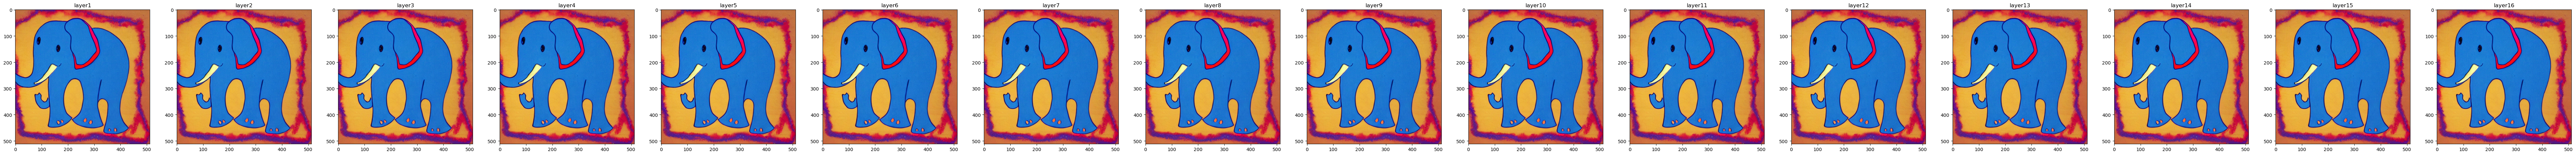

In [21]:
plt.figure(figsize=(100,20))
for m in range(16):
    
    envoys = model._envoy.envoys(lambda envoy : envoy._module_path.endswith('attn2'))# and envoy._module_path not in my_cross_layers[:m] )
    print(envoys)
    #intervention1 = AblationIntervention(envoys)
    
    blank_embeds = 1 #encode_prompt("", model)
    intervention2 = EncoderIntervention(blank_embeds, envoys)
    
    image = run(model, prompt="blue elephant", seed=40, interventions=[intervention2])
    image.save('testblank.png')
    plt.subplot(1, 16, m+1)
    plt.title(f"layer{m+1}")
    plt.imshow(image)
plt.show